In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image, display

In [2]:
Writer = animation.writers['pillow']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [3]:
plt.rcParams['animation.ffmpeg_path'] = '/Users/carlovoss/usr/local/bin/ffmpeg'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

# Analysis of Latent Space
#### Select columns with latent space

In [4]:
columns = ["latent_space_0","latent_space_1","latent_space_2","latent_space_3","latent_space_4",
           "latent_space_5","latent_space_6","status"]
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/cpps_data.csv", sep=";")
total = prediction_1[columns]

In [5]:
total.head()

,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4,latent_space_5,latent_space_6,status
0,0.027771,0.744479,0.236794,-0.131072,-0.259373,-0.124548,-0.004022,0
1,0.027426,0.741724,0.208205,-0.138652,-0.260017,-0.118001,-0.004004,0
2,0.028343,0.735963,0.155757,-0.153263,-0.251700,-0.096420,-0.003360,0
3,0.032610,0.724199,0.080416,-0.171165,-0.235179,-0.055448,-0.004133,0
4,0.029828,0.713280,-0.011824,-0.191630,-0.213282,0.007660,-0.007185,0


In [6]:
latent_space = total.iloc[:,0:7]

## Perform Principal Componant Analysis

In [43]:
columns = ['pc1', 'pc2', 'pc3', "pc4", "pc5", "pc6", "pc7"]

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = total["status"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,status
0,0.368937,0.364322,-0.205864,-0.072479,0.388049,0.045802,0.010729,0
1,0.345846,0.371232,-0.213475,-0.065553,0.389658,0.060427,0.005994,0
2,0.297256,0.375074,-0.233247,-0.052832,0.388718,0.082954,-0.003846,0
3,0.219903,0.375698,-0.262155,-0.034431,0.381414,0.109238,-0.018098,0
4,0.120813,0.378172,-0.308224,-0.010224,0.366571,0.134154,-0.030391,0


## Visualisation of Principal Component 1 and 2
### Non-anomalous samples

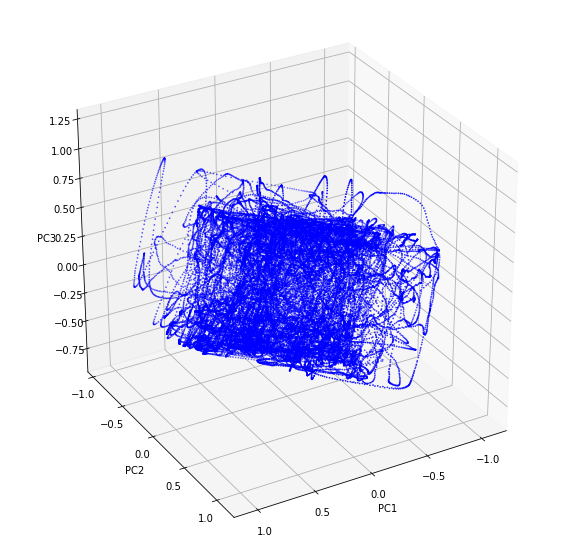

In [19]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
targets = [0]
colors = ['b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    xs = finalDf.loc[indicesToKeep, 'pc1']
    ys = finalDf.loc[indicesToKeep, 'pc2']
    zs = finalDf.loc[indicesToKeep, 'pc3']
    ax.scatter(xs, ys, zs, c = color, s =0.5)
    ax.view_init(azim=60)  
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Visualise time dynamics

In [21]:
%%capture
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
targets = [0]
colors = ['b']
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_zlim(-1.5,1.5)
ax.view_init(azim=120) 
data = finalDf.loc[finalDf.status == 0]

def animate_3d(i):
    xs = data.iloc[i:i+1, 0]
    ys = data.iloc[i:i+1, 1]
    zs = data.iloc[i:i+1, 2]
    graph._offsets3d = (xs, ys, zs)
    return graph,

graph = ax.scatter(data.pc1, data.pc2, data.pc3, c="b", s=1.5)

ani = animation.FuncAnimation(fig, animate_3d, frames=10000, blit=False)
ani.save('3dxxx.mp4', writer=writer)

KeyboardInterrupt: 

In [22]:
Video("3d.mp4")

### Anomalous samples

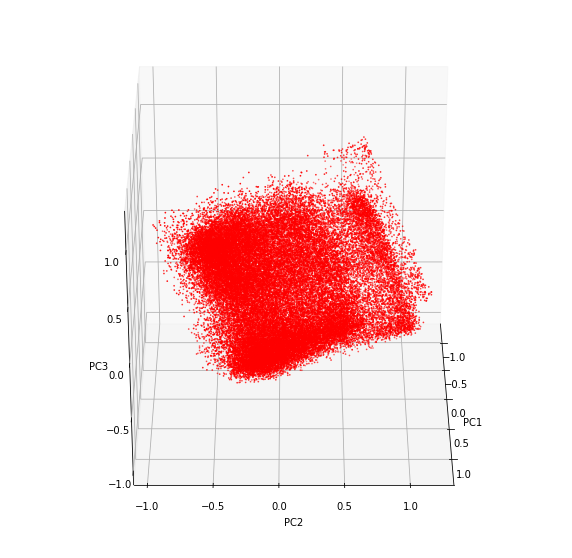

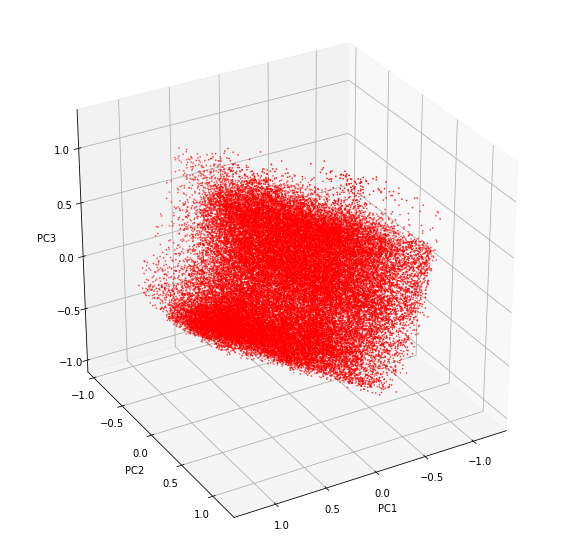

In [24]:
for i in range(0,120,60):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(111, projection='3d')
    targets = [2]
    colors = ['r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['status'] == target
        xs = finalDf.loc[indicesToKeep, 'pc1']
        ys = finalDf.loc[indicesToKeep, 'pc2']
        zs = finalDf.loc[indicesToKeep, 'pc3']
        ax.scatter(xs, ys, zs, c = color, s =0.5)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()


### Visualisation of time dynamics

In [51]:
%%capture
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_zlim(-1.5,1.5)
ax.view_init(azim=120) 
data = finalDf.loc[finalDf.status == 2]
data = data.reset_index(drop=True)
def animate_3d(i):
    xs = data.iloc[:i, 0]
    ys = data.iloc[:i, 1]
    zs = data.iloc[:i, 2]
    graph._offsets3d = (xs, ys, zs)
    return graph,

graph = ax.scatter(data.pc1, data.pc2, data.pc3, c="r", s=1.5)

ani = animation.FuncAnimation(fig, animate_3d, frames=3000, blit=False)
ani.save('3d_anomalous.mp4', writer=writer)

KeyboardInterrupt: 

In [21]:
"""
%%capture
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_zlim(-1.5,1.5)

def animate_3d(i):
    targets = [0, 1]
    colors = ['b','r']
    data = finalDf.iloc[50000:i,:]
    
    for target, color in zip(targets,colors):
        indicesToKeep = data['status'] == target
        xs = data.loc[indicesToKeep, 'pc1']
        ys = data.loc[indicesToKeep, 'pc2']
        zs = data.loc[indicesToKeep, 'pc3']
        ax.scatter(xs, ys, zs, c = color, s =0.5)
        ax.view_init(azim=120) 

ani = animation.FuncAnimation(fig, animate_3d, frames=range(50000,50100), repeat=True)
ani.save('3d_anomalous.mp4', writer=writer)
"""

In [52]:
Video("3d_anomalous.mp4")

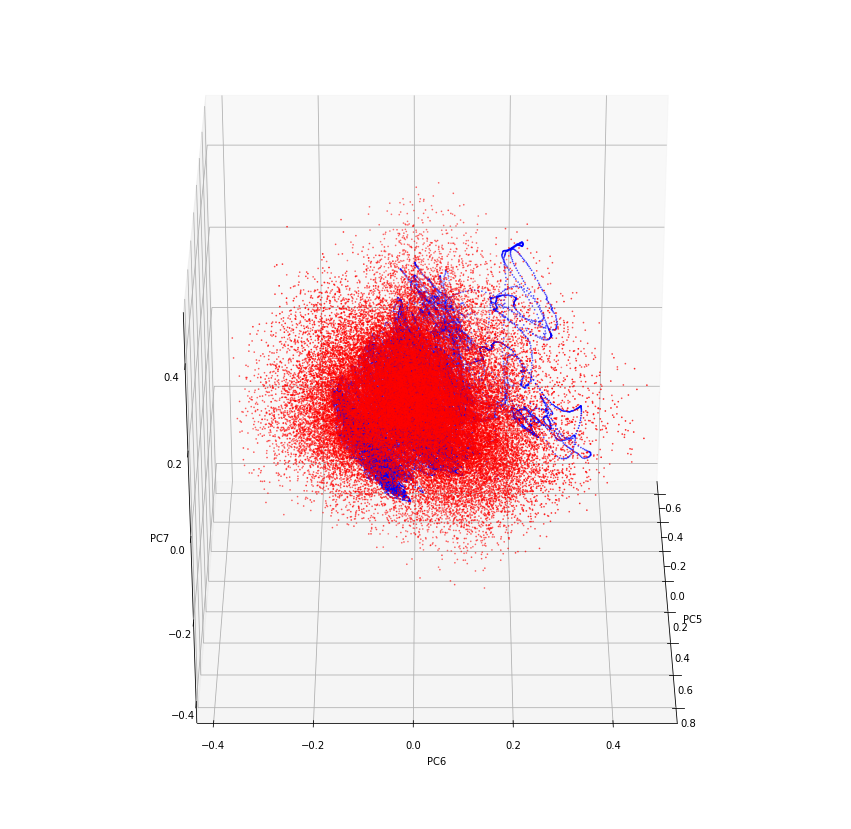

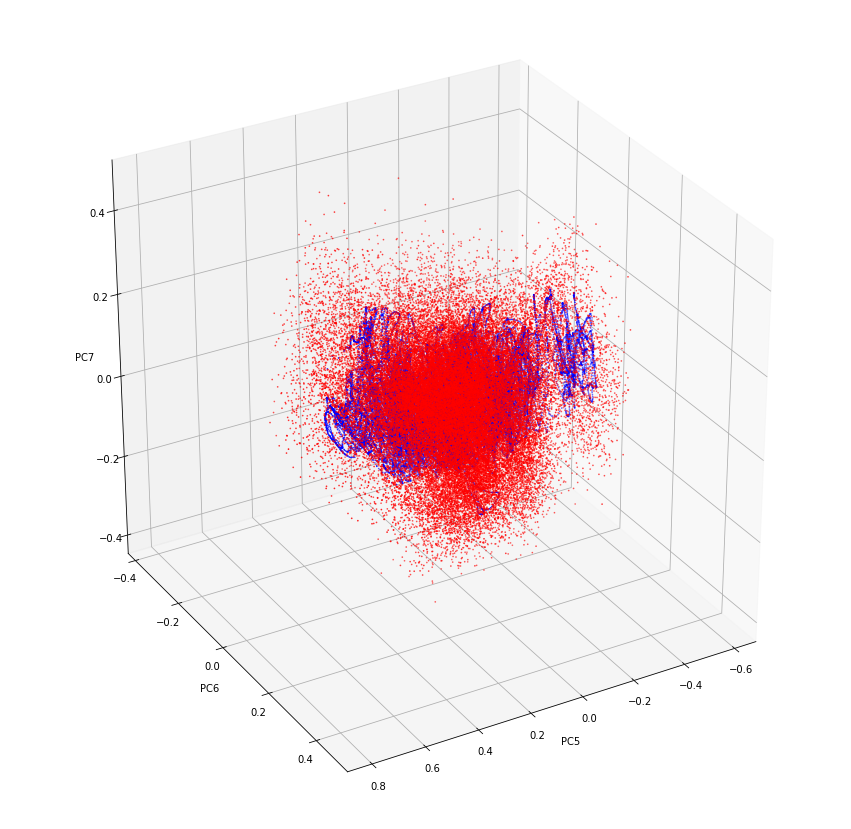

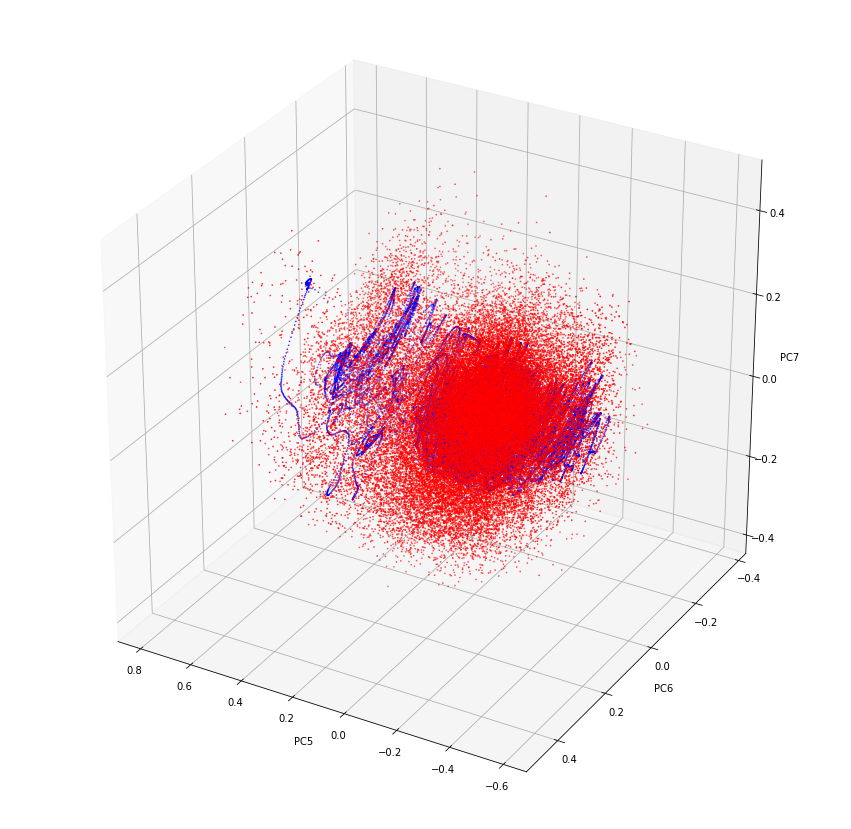

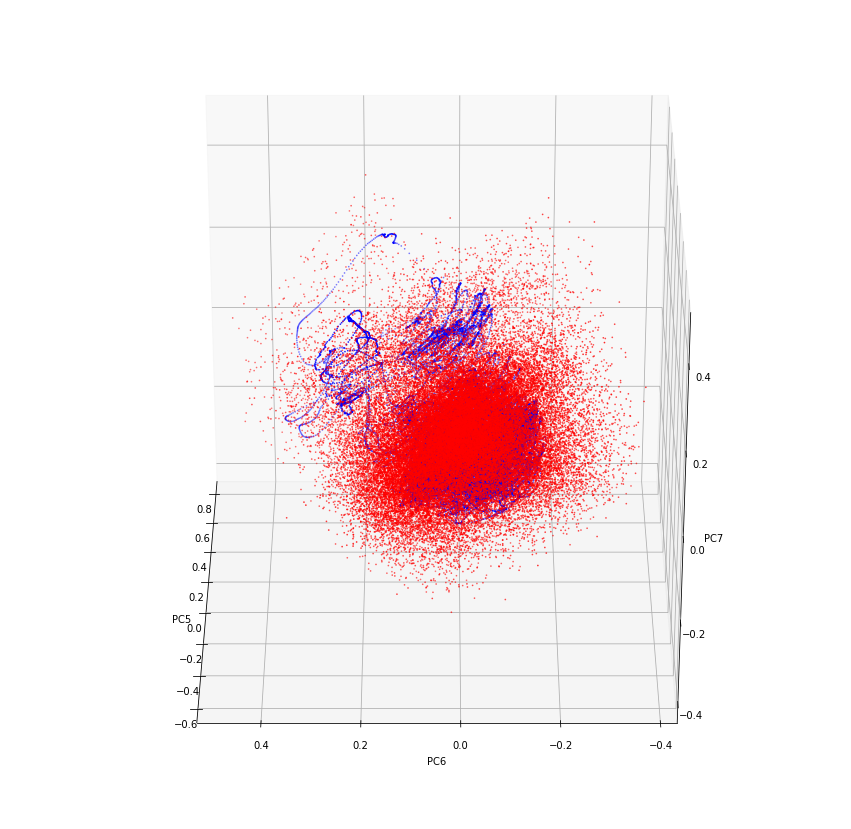

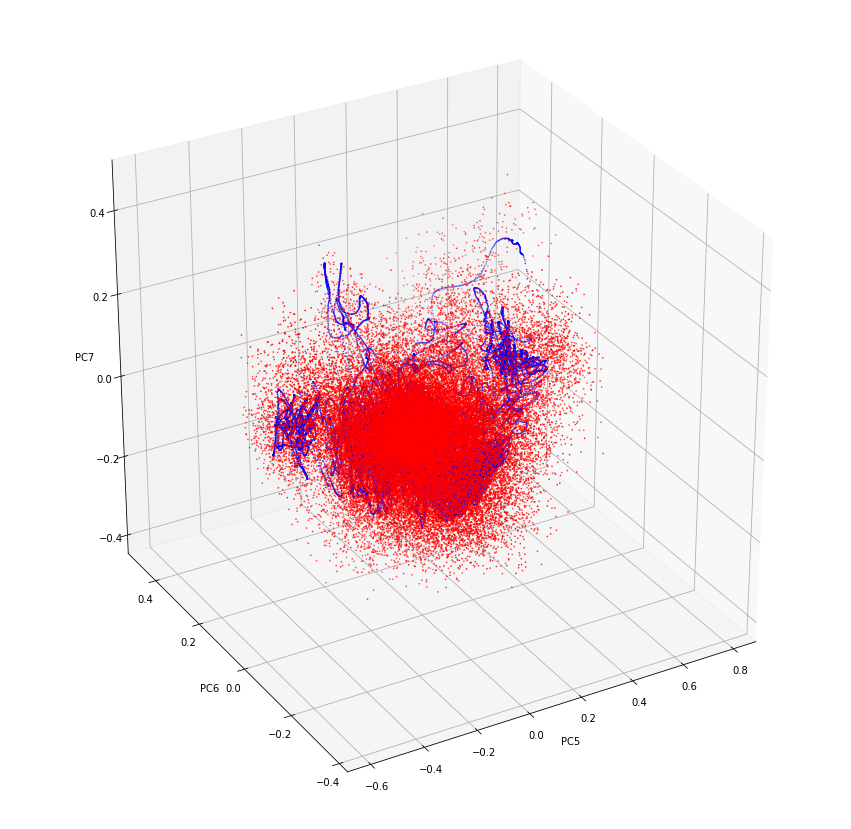

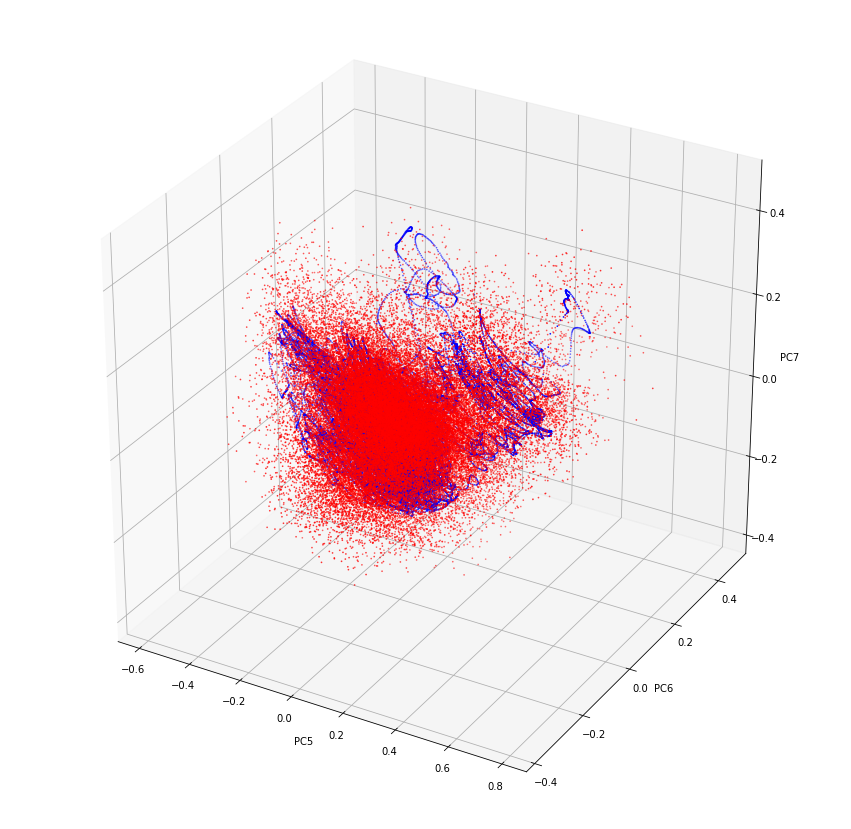

In [27]:
for i in range(0,360,60):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 2]
    colors = ['b','r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['status'] == target
        xs = finalDf.loc[indicesToKeep, 'pc5']
        ys = finalDf.loc[indicesToKeep, 'pc6']
        zs = finalDf.loc[indicesToKeep, 'pc7']
        ax.scatter(xs, ys, zs, c = color, s =0.5)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC5')
    ax.set_ylabel('PC6')
    ax.set_zlabel('PC7')
    plt.show()

## Distance Measurements

In [18]:
columns = ["latent_space_0","latent_space_1","latent_space_2","latent_space_3","latent_space_4",
           "latent_space_5","latent_space_6","status"]
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/cpps_data.csv", sep=";")
total = prediction_1[columns]
total = total.loc[(total.status == 0) | (total.status == 2)]

In [19]:
total.head()
total.shape

(99900, 8)

In [20]:
latent_space = total.iloc[:,0:7]

In [21]:
columns = ['pc1', 'pc2', 'pc3', "pc4", "pc5", "pc6", "pc7"]

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = total["status"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,status
0,0.362926,0.363862,-0.202512,-0.072627,0.389084,0.050353,-0.005847,0.0
1,0.339716,0.370590,-0.210033,-0.065839,0.390527,0.062013,-0.015900,0.0
2,0.291030,0.374082,-0.229767,-0.053289,0.389381,0.078943,-0.033688,0.0
3,0.213621,0.374064,-0.258683,-0.035119,0.381818,0.097621,-0.056945,0.0
4,0.114440,0.375811,-0.304705,-0.011198,0.366657,0.115844,-0.077763,0.0


In [26]:
pca = finalDf.iloc[:,0:4]
pca = pca.dropna()
pca.head()

,pc1,pc2,pc3,pc4
0,0.362926,0.363862,-0.202512,-0.072627
1,0.339716,0.370590,-0.210033,-0.065839
2,0.291030,0.374082,-0.229767,-0.053289
3,0.213621,0.374064,-0.258683,-0.035119
4,0.114440,0.375811,-0.304705,-0.011198


In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(pca)

In [14]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
1 in clustering.labels_

True

In [ ]:
df_status_clusters = finalDf.status

In [ ]:
df_status_clusters["clusters"] = clustering.labels_

In [ ]:
df_status_clusters.status.replace(2, 1)

In [ ]:
df_status_clusters.head()

In [ ]:
# vector of word hochzeit:
word_hochzeit = df_7_dim.loc["blutkreislauf",:].values
distance_df = pd.DataFrame(columns=["distance to _blutkreislauf_"])

for index, word in df_7_dim.iterrows():
    distance_pair = distance.euclidean(word_hochzeit, word.values)
    df = pd.DataFrame(distance_pair, columns=["distance to _blutkreislauf_"], index= [word.name])
    distance_df.append(df)

-- 

In [1]:

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
import numpy as np

colors = 10 * ["g", "r", "c", "b", "k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def update(self, new_data, delta):
        for featureset in new_data:
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]

            if min(distances) < delta:
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            else:
                self.centroids[self.k] = featureset
                self.classifications[self.k] = []
                self.classifications[self.k].append(featureset)
                self.k = self.k + 1

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [8,10],
              [9,8],
              [3,2],
              [1,4],
              [1, 0.6],
              [9, 11]])

clf = K_Means()
clf.fit(X)

X1 = np.array([[6, 8],
               [7, 10],
               [6, 4],
               [2, 2],
               [2, 3]])

#Updating the model with X1 and threshold of 4 
clf.update(X1, 4)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

50.0
513.8888888888889
19.333333333333336
85.97370695537461


<Figure size 640x480 with 1 Axes>